In [19]:

from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

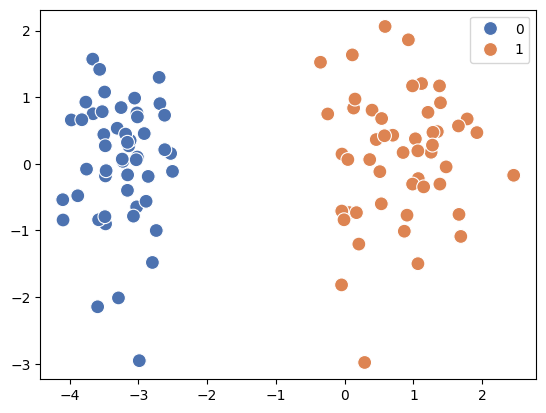

In [21]:
sns.scatterplot(x=X[:,0],y=X[:,1],palette='deep',s=100,hue=y)


In [22]:
def step(y_hat):
    return 1 if y_hat>0 else 0

In [23]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)#at the 0th column insert 1 
    weights=np.ones(X.shape[1])
    lr=0.1#learning rate
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(X[j]@weights)
        weights=weights+lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]


In [24]:
intercept,coef=perceptron(X,y)


In [25]:
print(intercept)
print(coef)

1.3000000000000003
[1.05343617 0.2221512 ]


In [26]:
m=-(coef[0]/coef[1])
b=-(intercept/coef[1])#for the line y=mx+b from AX+BY+C=0
print(m,b)

-4.741978363208182 -5.851870329508209


In [27]:
x_input=np.linspace(-3,3,100)
y_input=(m*x_input+b)

(-3.0, 2.0)

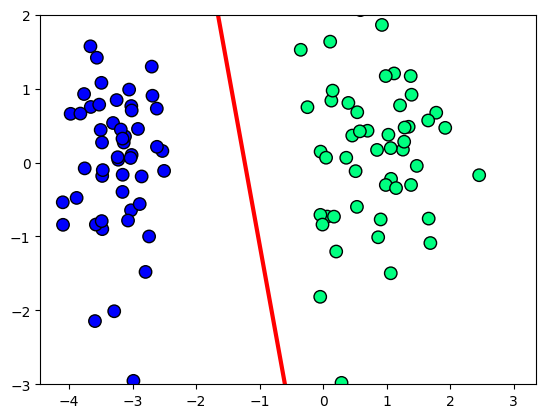

In [28]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],cmap='winter',c=y,s=80,edgecolors='black')
plt.ylim(-3,2)

In [29]:

from matplotlib.animation import FuncAnimation
from matplotlib.animation import Animation


In [30]:

def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        if weights[2] != 0:
            m.append(-(weights[1] / weights[2]))
            b.append(-(weights[0] / weights[2]))
        else:
            m.append(0)
            b.append(0)
    return m,b
        

In [31]:
m,b=perceptron(X,y)

MovieWriter ffmpeg unavailable; using Pillow instead.


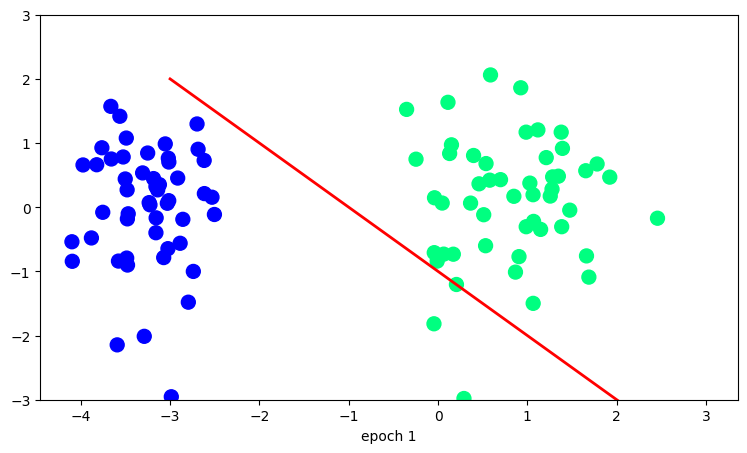

In [32]:

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.linspace(-3, 3, 100)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0], 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
anim.save('animation.gif')

In [33]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [34]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [35]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

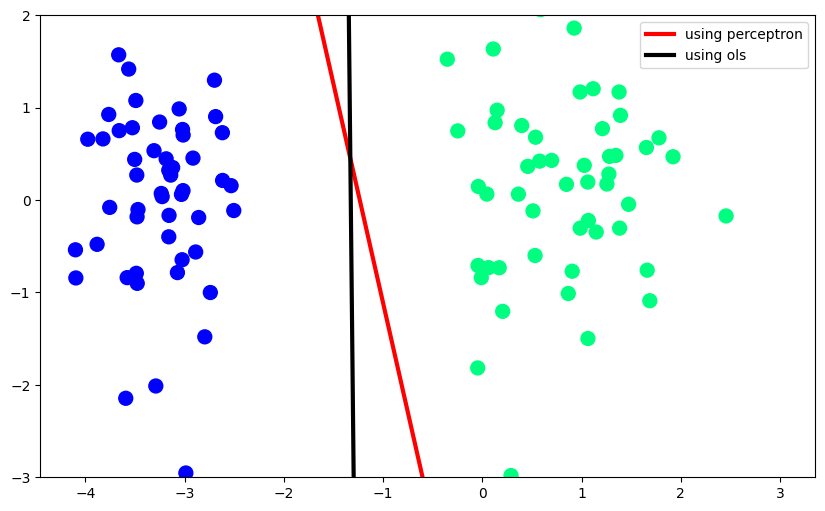

In [36]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='using perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='using ols')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

We see different lines because the perceptron as soon as the classification is better stops. but the sklearn method gives te better fitting line than the pereceptron.